In [27]:
# 1) Завантажити дані, вивести назви колонок і розмір датасета

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("user_behavior_dataset.csv")   # https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [26]:
# 2) Опрацювати пропуски (по можливості заповнити їх або видалити). Пропуски відсутні

<Axes: >

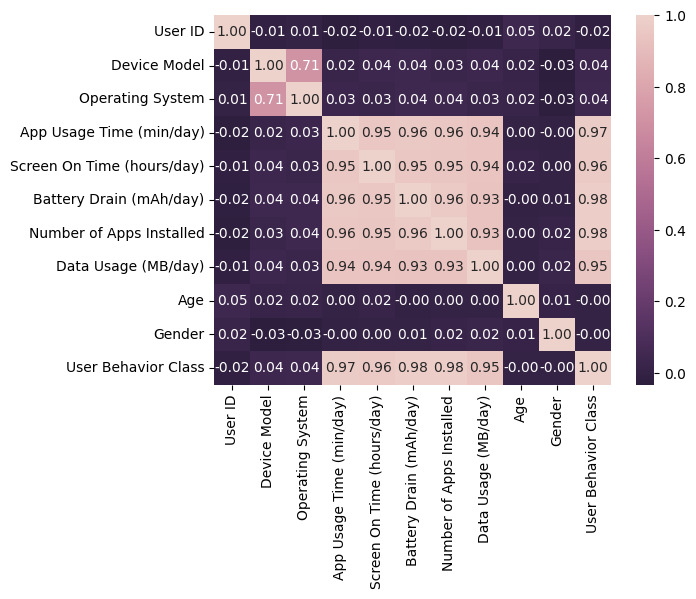

In [28]:
# 3.1) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою)

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
df_copy["Device Model"] = LabelEncoder().fit_transform(df_copy["Device Model"])
df_copy["Operating System"] = LabelEncoder().fit_transform(df_copy["Operating System"])
df_copy["Gender"] = LabelEncoder().fit_transform(df_copy["Gender"])


sns.heatmap(df_copy.corr(), cmap=sns.cubehelix_palette(reverse=True, as_cmap=True), annot=True, fmt=".2f")



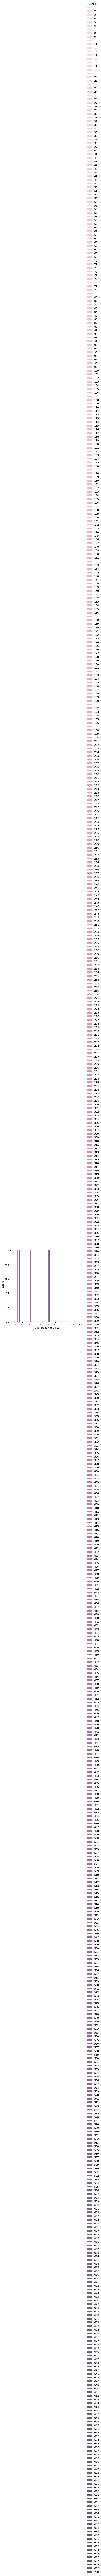

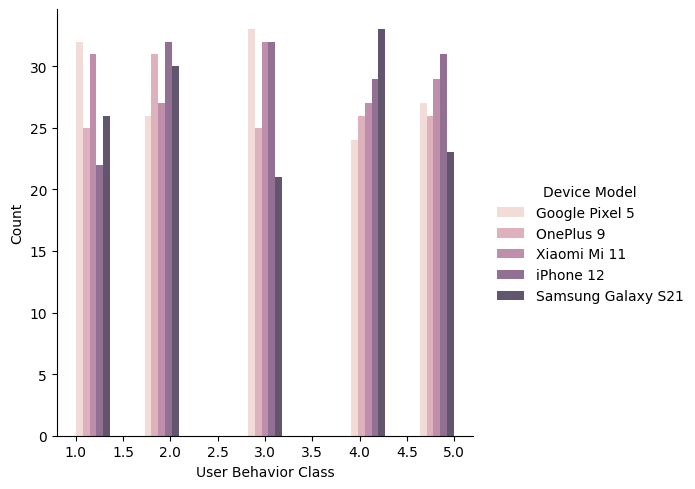

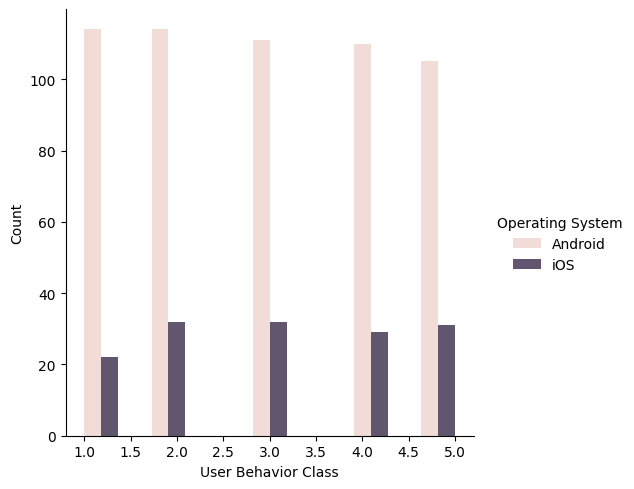

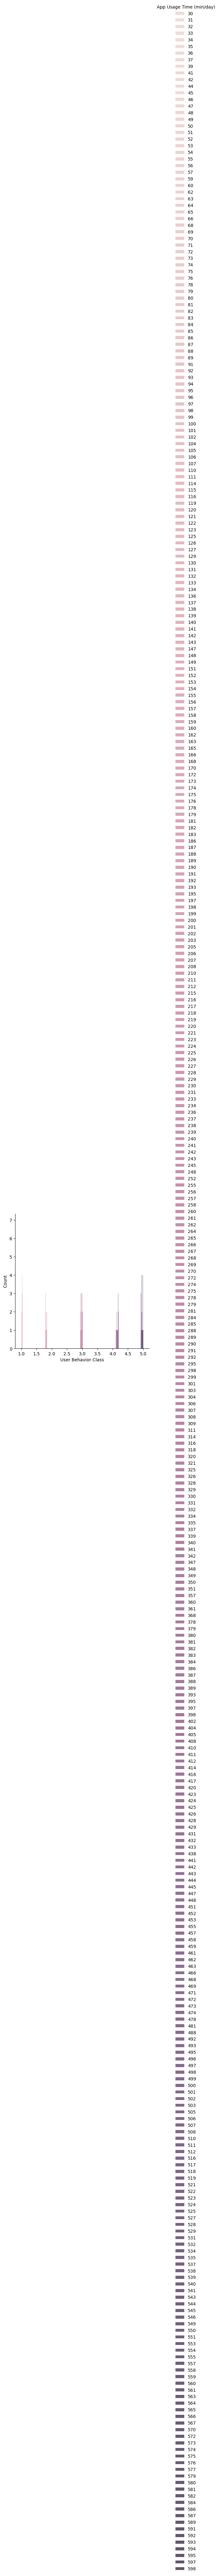

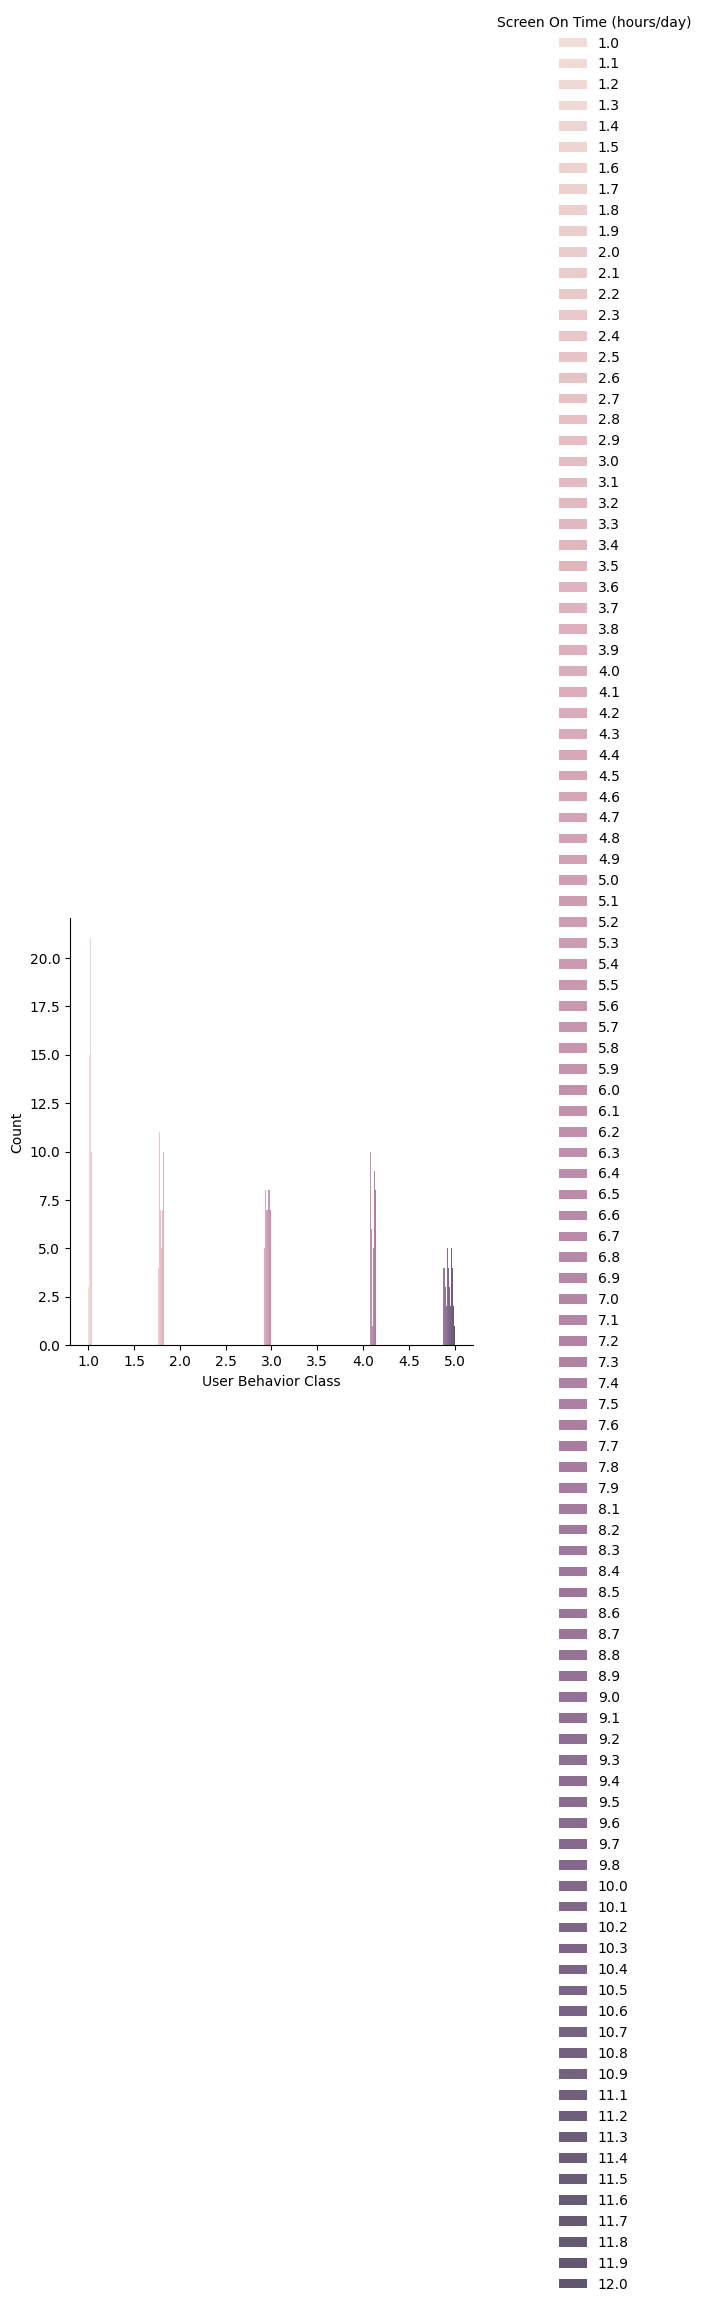

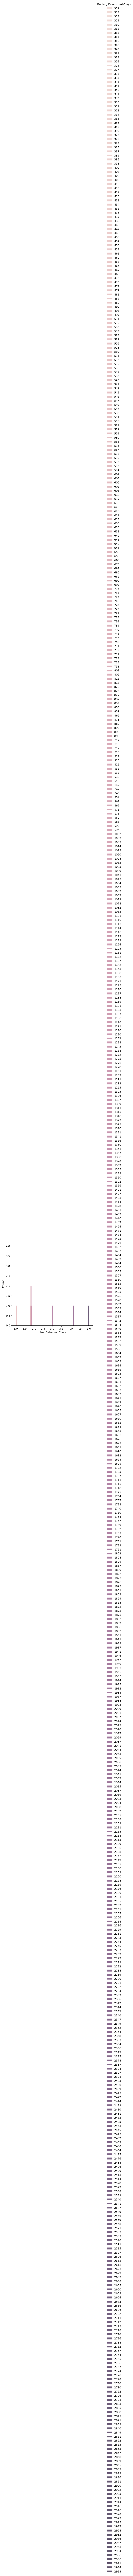

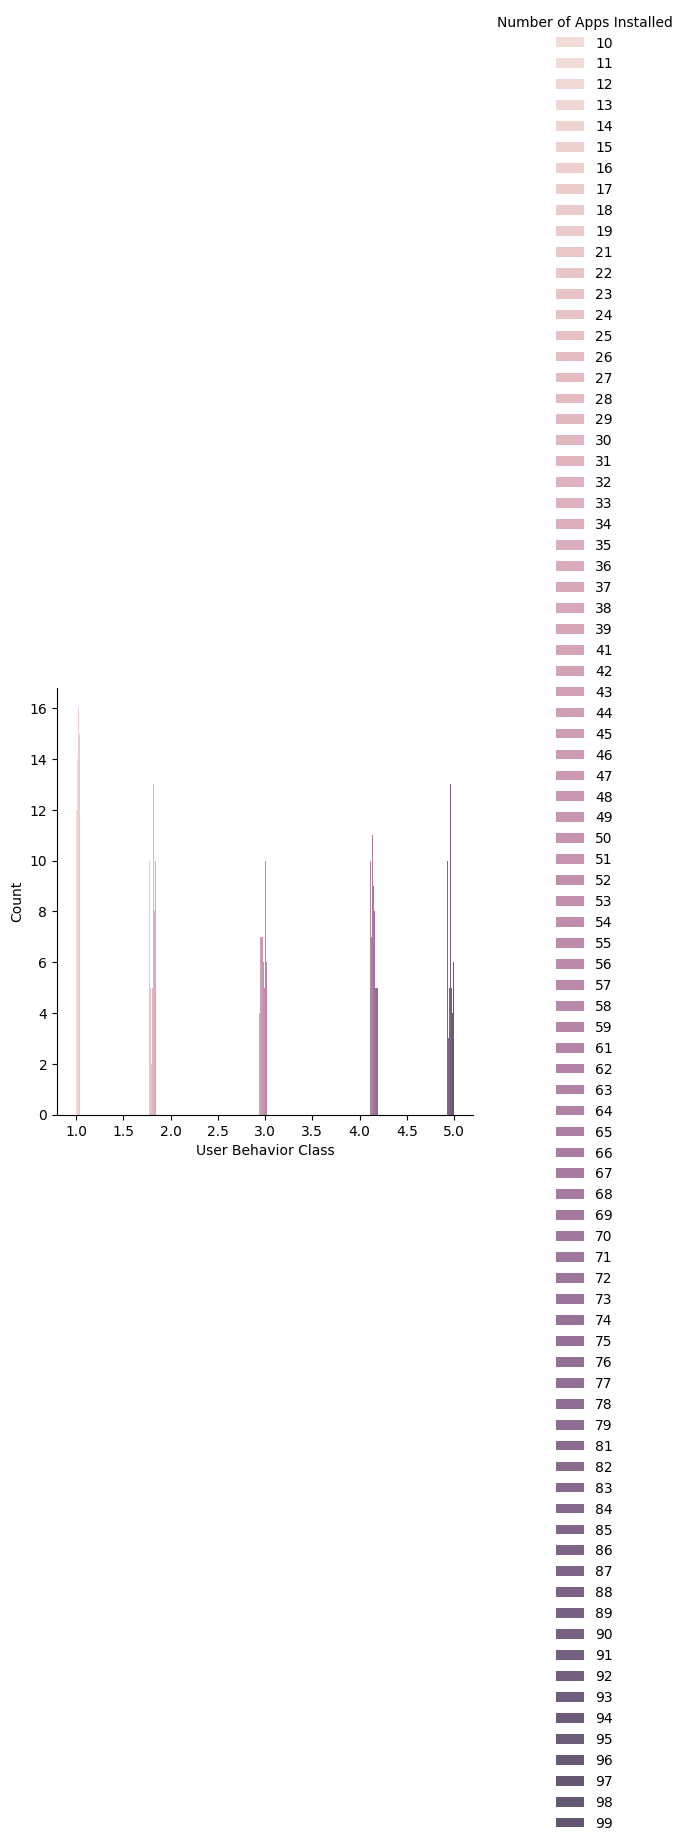

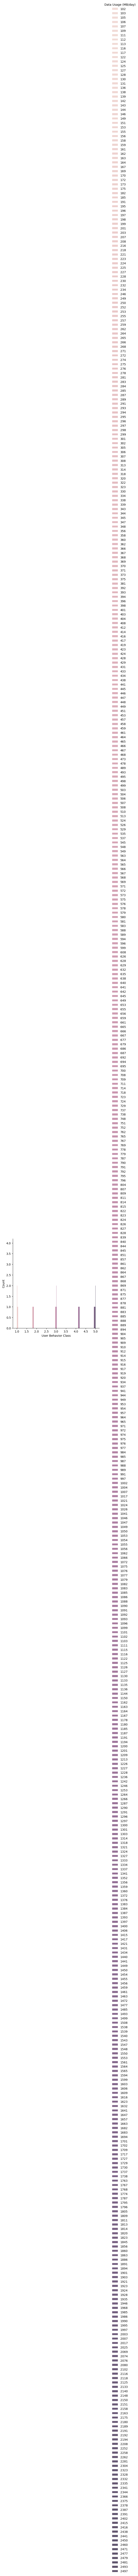

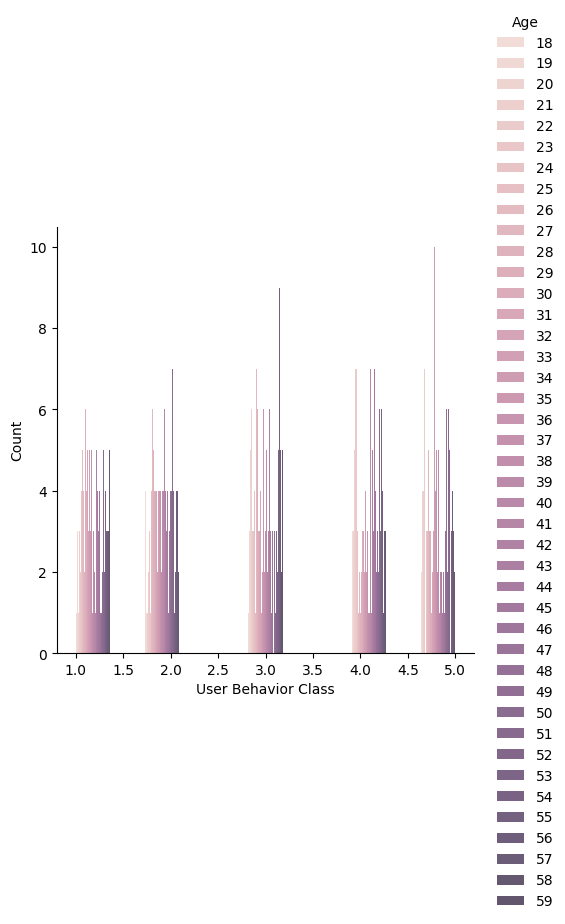

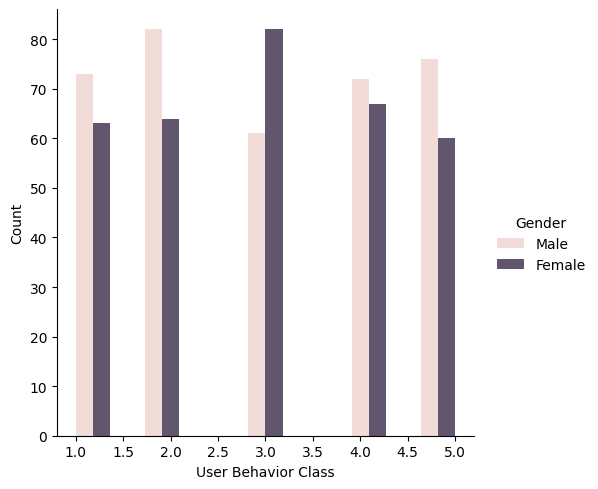

In [4]:
# 3.2) Побудувати гістограму розподілу ознак відносно цільової змінної

for i in list(df)[:-1]:
    sns.displot(x="User Behavior Class", hue=i, data=df, multiple='dodge', linewidth=0, palette=sns.cubehelix_palette(len(df[i].unique())))

C:\Users\111\AppData\Local\Temp\ipykernel_17948\2796690743.py:5: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="User Behavior Class", y=i, data=df, linewidth=0.5, palette=sns.cubehelix_palette(3, reverse=True))
C:\Users\111\AppData\Local\Temp\ipykernel_17948\2796690743.py:5: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="User Behavior Class", y=i, data=df, linewidth=0.5, palette=sns.cubehelix_palette(3, reverse=True))
C:\Users\111\AppData\Local\Temp\ipykernel_17948\2796690743.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x="User Behavior Class", y=i, data=df, linewidth=0.5, palette=sns.cubehelix_palette(3, reverse=True))
C:\Users\111\AppData\Local\Temp\ipykernel_17948\2796690743.py:5: UserWarning: 
The palette list has fewer val

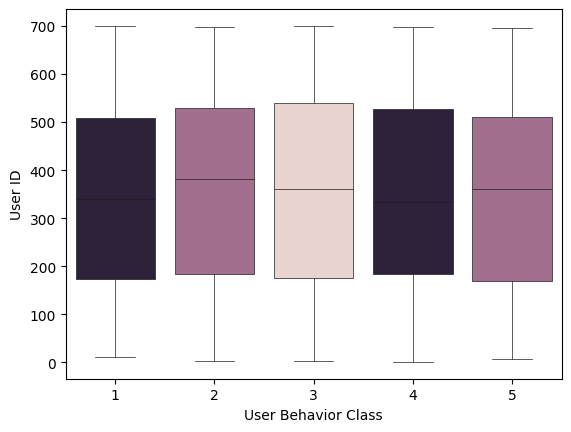

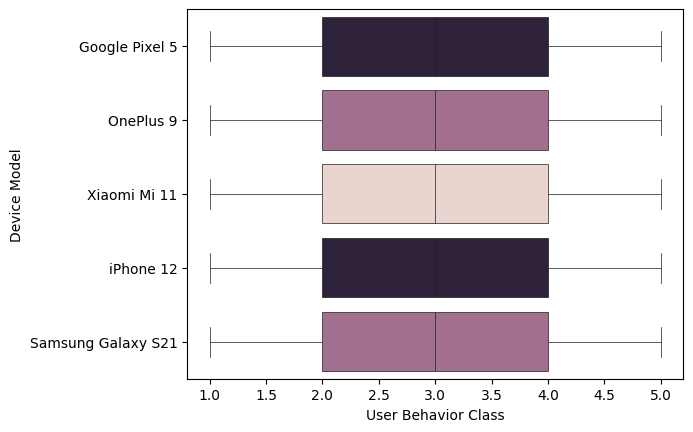

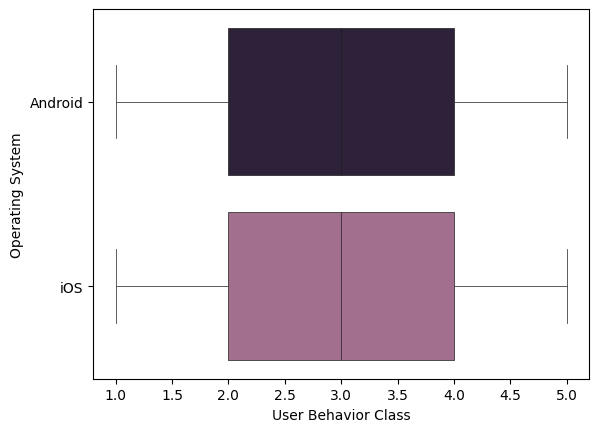

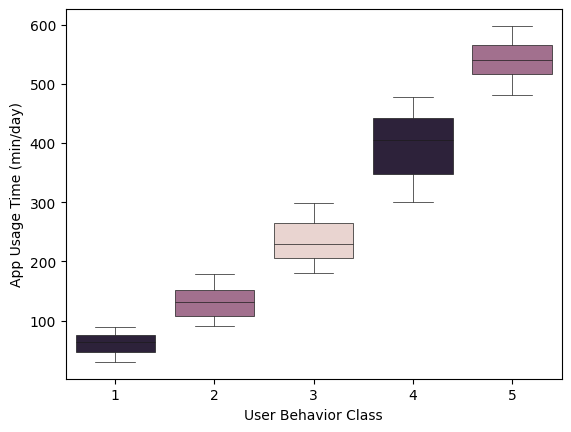

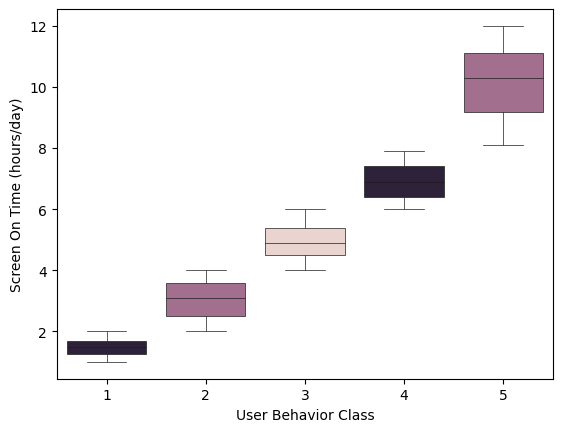

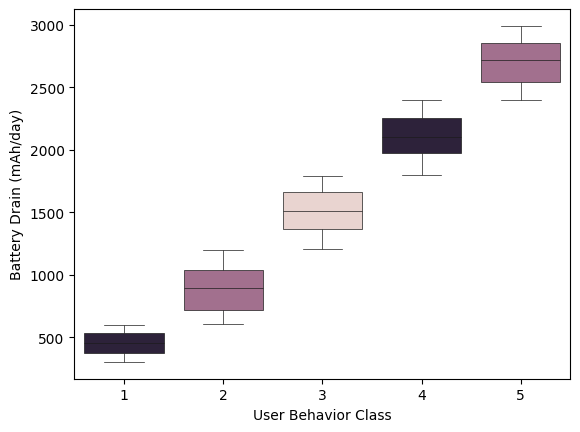

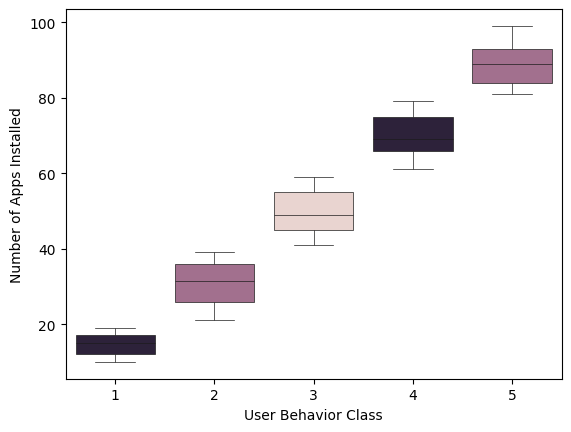

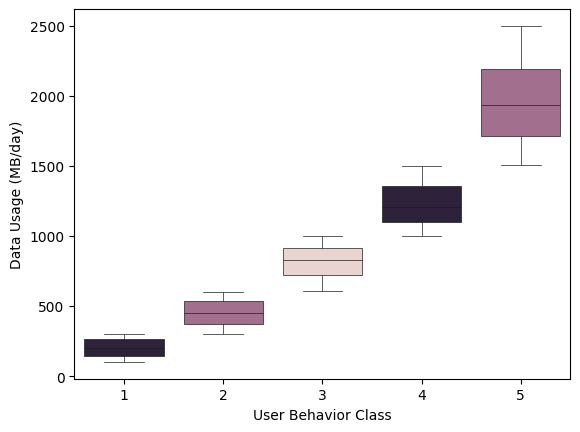

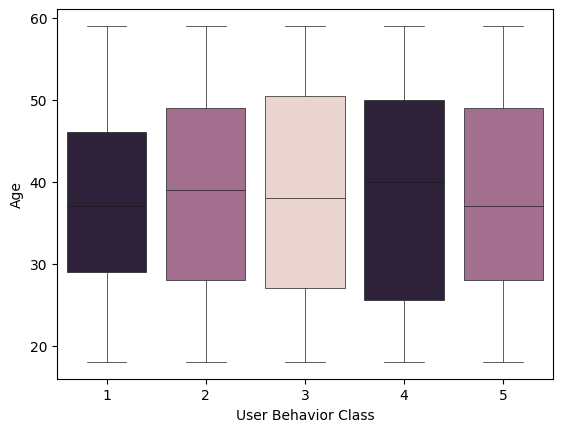

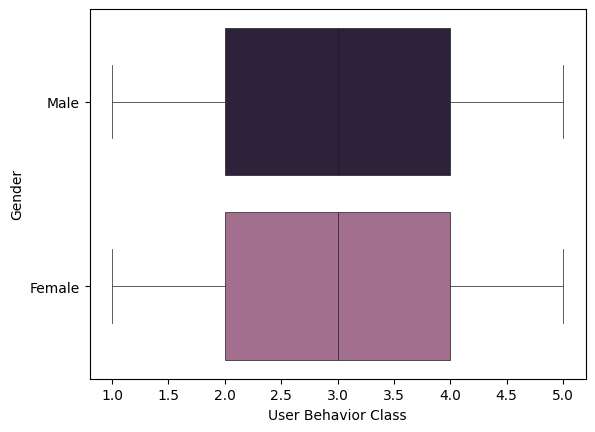

In [6]:
# 3.3) Побудувати boxplot-и ознак відносно цільової змінної

for i in list(df)[:-1]:
    figure = plt.figure()
    sns.boxplot(x="User Behavior Class", y=i, data=df, linewidth=0.5, palette=sns.cubehelix_palette(3, reverse=True))

In [8]:
# 4) Нормалізувати дані

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_copy.drop('User Behavior Class', axis = 1)
y = df_copy['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [9]:
# 5.1.1) kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))

[[33  3  0  0  0]
 [ 4 43  0  0  0]
 [ 0  1 47  2  0]
 [ 0  0  0 36  0]
 [ 0  0  0  2 39]]

               precision    recall  f1-score   support

           1       0.89      0.92      0.90        36
           2       0.91      0.91      0.91        47
           3       1.00      0.94      0.97        50
           4       0.90      1.00      0.95        36
           5       1.00      0.95      0.97        41

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.94      0.94       210

accuracy:  0.9428571428571428


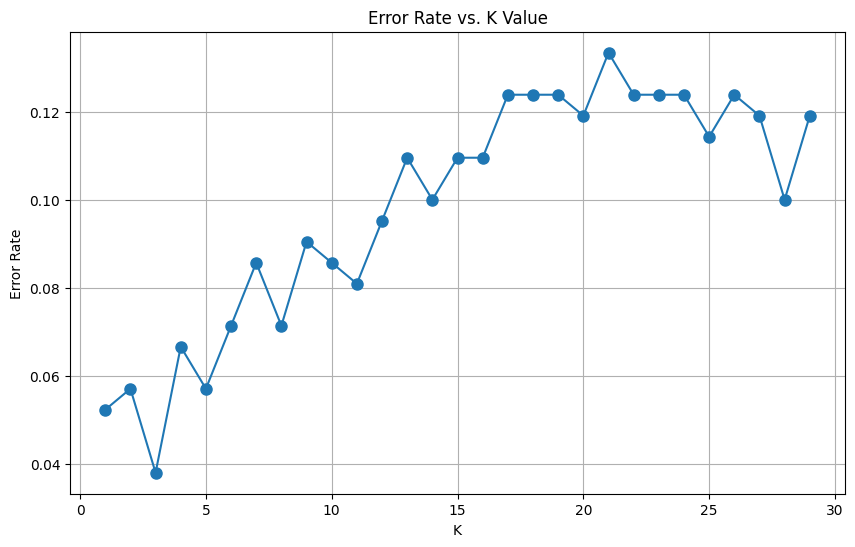

In [11]:
# 5.1.2) Сhoose k

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [18]:
# 5.1.3) Best k

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train,y_train)

y_pred = knn_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))

[[35  1  0  0  0]
 [ 4 43  0  0  0]
 [ 0  1 49  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  2 39]]

               precision    recall  f1-score   support

           1       0.90      0.97      0.93        36
           2       0.96      0.91      0.93        47
           3       1.00      0.98      0.99        50
           4       0.95      1.00      0.97        36
           5       1.00      0.95      0.97        41

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210

accuracy:  0.9619047619047619


In [19]:
# 5.2.1) Дерево ухвалення рішень

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))

[[36  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 41]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

accuracy:  1.0


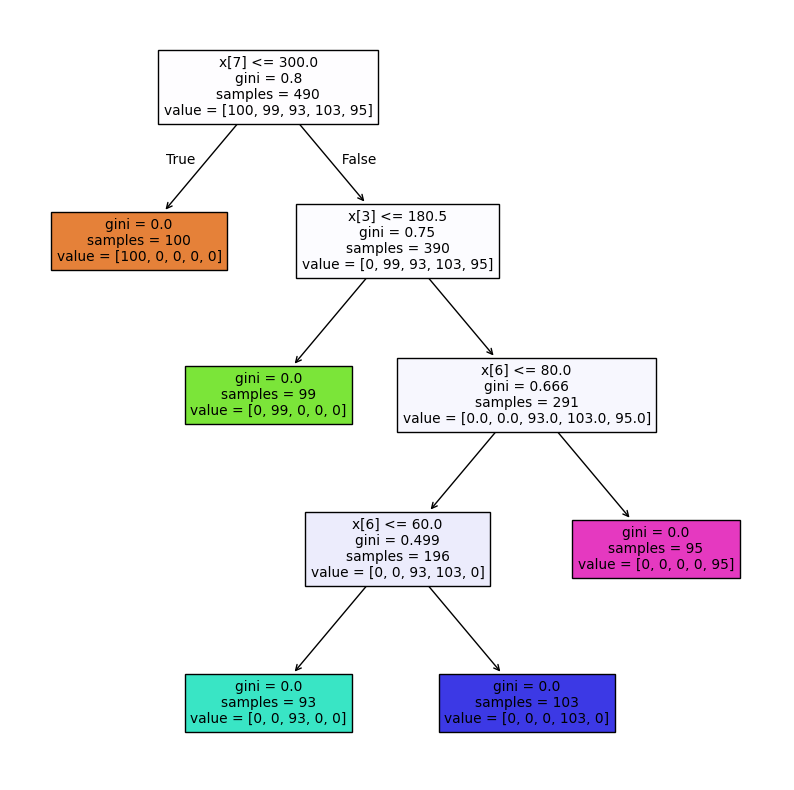

In [20]:
# 5.2.2) Візуалізація дерева

plt.figure(figsize = (10, 10))
plot_tree(tree_model, filled = True)
plt.show()

In [21]:
# 5.3.1) SVM

from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(scaled_X_train, y_train)

y_pred = svc_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))

[[36  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 41]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

accuracy:  1.0


In [23]:
# 5.3.2) GridSearch

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid)
grid.fit(scaled_X_train, y_train)
print(grid.best_params_, '\n')

grid_predictions = grid.predict(scaled_X_test)

print(confusion_matrix(y_test, grid_predictions))
print('\n', classification_report(y_test, grid_predictions))
print('accuracy: ', accuracy_score(y_test, grid_predictions))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 

[[36  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 41]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

accuracy:  1.0


In [24]:
# 5.4) Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(scaled_X_train, y_train)

y_pred = forest_model.predict(scaled_X_test)

print(confusion_matrix(y_test, grid_predictions))
print('\n', classification_report(y_test, grid_predictions))
print('accuracy: ', accuracy_score(y_test, grid_predictions))

[[36  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 41]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

accuracy:  1.0


In [25]:
# 5.5) AdaBoost

from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(scaled_X_train, y_train)

y_pred = adaboost_model.predict(scaled_X_test)

print(confusion_matrix(y_test, grid_predictions))
print('\n', classification_report(y_test, grid_predictions))
print('accuracy: ', accuracy_score(y_test, grid_predictions))

[[36  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 41]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

accuracy:  1.0
